In [ ]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import sentiment_mod as s

#consumer key, consumer secret, access token, access secret.
ckey = #"consumer key"
csecret = #"consumer secret"
atoken = #"access-token"
asecret = #"access secret"

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)
        
        tweet = all_data["text"]
        sentiment_value, confidence = s.sentiment(tweet)
        print(tweet, sentiment_value, confidence)
        if confidence*100 >= 80:
            output = open('twitter-out.txt','a')
            output.write(sentiment_value)
            output.write('\n')
            output.close()
         
        return True

    def on_error(self, status):
        print(status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["clinton"])

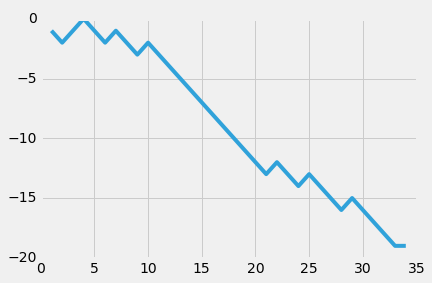

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

% matplotlib inline

style.use('fivethirtyeight')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    graph_data = open('twitter-out.txt','r').read()
    lines = graph_data.split('\n')
    xs = []
    ys = []
    
    x = 0
    y = 0
    for line in lines:
        x+=1
        if 'pos' in line:
            y +=1
        elif 'neg' in line:
            y -=1
        
        xs.append(x)
        ys.append(y)

    ax1.clear()
    ax1.plot(xs, ys)
    
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()